# Pentaquark analysis with $\Lambda_b\to J/\psi p K$ decay

In [2]:
## Use full `ThreeBodyDecay` module
## try Pkg.add("ThreeBodyDecay")
# using ThreeBodyDecay
# Lb2JpK = ThreeBodySystem(5.62,3.09,0.938,0.458)

## Otherwise, minimal code is below
struct ThreeBodySystem
    s::Float64
    msq::Vector{Float64}
    mthsq::Vector{Float64}
    sthsq::Vector{Float64}
end
#
ThreeBodySystem(e,m1,m2,m3) = ThreeBodySystem(e^2, [m1,m2,m3].^2, [m2+m3,m3+m1,m1+m2].^2, [e-m1,e-m2,e-m3].^2);
#
λ(x,y,z)=x^2+y^2+z^2-2x*y-2y*z-2z*x
Kibble(s,m2s,σs) = (2σs[2]*(m2s[1]+s-σs[1])-(s+σs[2]-m2s[2])*(σs[2]+m2s[1]-m2s[3]))^2 - λ(s,σs[2],m2s[2])*λ(σs[2],m2s[1],m2s[3])
Kibble31(σ3, σ1, tbs::ThreeBodySystem) = Kibble(tbs.s, [tbs.msq[2],tbs.msq[3],tbs.msq[1]], [tbs.s+sum(tbs.msq)-σ1-σ3,σ3,σ1]);

# lineshape
pole(σ,mcsq) = 1.0/(mcsq - σ)
BW(σ,m,Γ) = m*Γ*pole(σ,m^2-1im*m*Γ)
#
struct Lineshape
    pars::Vector{Real}
end
BreitWigner(m,Γ) = Lineshape([m,Γ])
amp(s,lsh::Lineshape) = BW(s,lsh.pars[1],lsh.pars[2]);

In [3]:
Lb2JpK = ThreeBodySystem(5.62,3.09,0.938,0.49367);

In [4]:
using Plots
using Interact
#
function plot_dalitz_with_projections(f=(σ3,σ1)->1.0)
    # layout = @layout [a{0.8h}; grid(1,2)]
    layout = @layout [a{0.65w,0.7h} b; c _]
    plot(layout=layout, size=(800,600), link=:both)
    #
    σ1v = LinRange(Lb2JpK.mthsq[1],Lb2JpK.sthsq[1], 202)
    σ3v = LinRange(Lb2JpK.mthsq[3],Lb2JpK.sthsq[3], 200)
    cal = [Kibble31(σ3,σ1,Lb2JpK) < 0 ? f(σ3,σ1) : NaN for σ3 in σ3v, σ1 in σ1v]
    heatmap!(σ1v, σ3v, cal, c=:viridis, colorbar=false, sp=1,
        ylab="m[J/psi p] (GeV^2)", xlab="m[p K] (GeV^2)")
    #
    calz = map(z->isnan(z) ? 0.0 : z, cal)
    plot!(sum(calz, dims=2)[:,1], σ3v, lab="", xaxis=false, l=(2,:black), sp=2)
    plot!(σ1v, sum(calz, dims=1)[1,:], lab="", yaxis=false, l=(2,:black), sp=3)
end;

┌ Info: Recompiling stale cache file C:\Users\mikha\.julia\compiled\v1.1\Plots\ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file C:\Users\mikha\.julia\compiled\v1.1\Interact\XmYW4.ji for Interact [c601a237-2ae4-5e1e-952c-7a85b0c7eef1]
└ @ Base loading.jl:1184


HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-2018905659628791554\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-11882232332206454999\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio/main\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n        console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n        require([\"/assetserver/1ea2c7a56d53250e18dc76d9c787e50c908e9f23-dist/main.js\"], function (webIOModule) {\n            webIOModule.load_ipython_extension();\n        });\n        warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<div\n    id=\"webio-warning-2018905659628791554\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    <!-- TODO: link to installation docs. -->\n</div>\n")

## Phase-space distribution - flat Dalitz plot

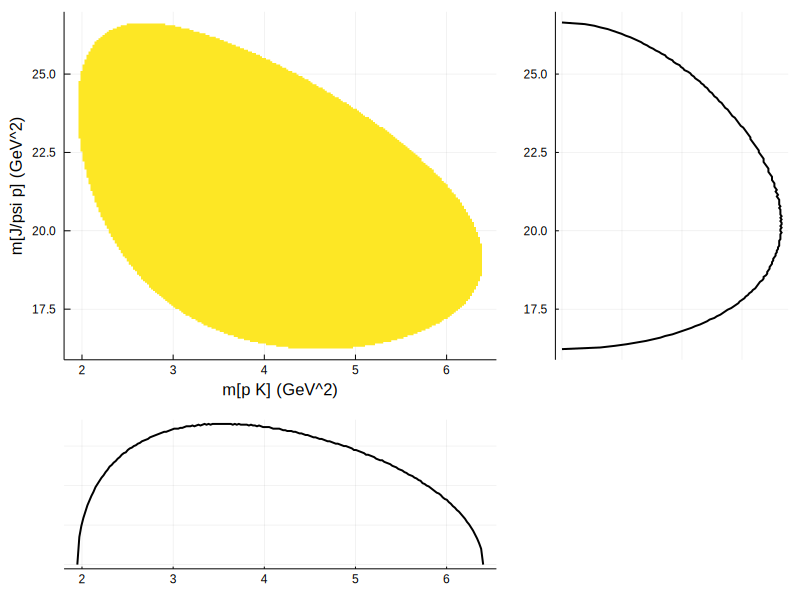

In [36]:
plot_dalitz_with_projections()

## Position and width of resonances

In [37]:
# scattering amplitude
function A(σ3,σ1, CS, Cs)
    σs = [σ1, Lb2JpK.s-sum(Lb2JpK.msq)-σ1-σ3, σ3]
    sum(c*amp(σs[ch[1]], ch[2])  for (ch,c) in zip(CS,Cs))
end

# intensity
I(σ3,σ1, CS, Cs) = abs2(A(σ3,σ1, CS, Cs));

I (generic function with 1 method)

In [38]:
@manipulate for mΛ in LinRange(1.4,1.9,30), ΓΛ in LinRange(0.02,0.15,30)
    plot_dalitz_with_projections((σ3,σ1)->I(σ3,σ1,
        [(1,BreitWigner(mΛ,ΓΛ))],
        [1.0]))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope("scope-5e6e4882-c5dc-4d18-87a8-4e146788de0c", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["mΛ"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row-left"), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>30,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-center"), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-right"), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget"), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Any} with 2 listeners. Value:
15, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "C:\\Users\\mikha\\.julia\\packages\\Knockout\\1sDlc\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\mikha\\.julia\\packages\\Knockout\\1sDlc\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\mikha\\.julia\\packages\\InteractBase\\l8cEC\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\mikha\\.julia\\packages\\InteractBase\\l8cEC\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\mikha\\.julia\\packages\\Interact\\0klKX\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes"=>Any[JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:9223372036854775807,sz_curr:0), Set(AbstractConnection[]), Channel{AbstractConnection}(sz_max:32,sz_curr:0)), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1.4\",\"1.41724\",\"1.43448\",\"1.45172\",\"1.46897\",\"1.48621\",\"1.50345\",\"1.52069\",\"1.53793\",\"1.55517\",\"1.57241\",\"1.58966\",\"1.6069\",\"1.62414\",\"1.64138\",\"1.65862\",\"1.67586\",\"1.6931\",\"1.71034\",\"1.72759\",\"1.74483\",\"1.76207\",\"1.77931\",\"1.79655\",\"1.81379\",\"1.83103\",\"1.84828\",\"1.86552\",\"1.88276\",\"1.9\"],\"changes\":WebIO.getval({\"name\":\"chan

## Strength of resonances
Model with 5 $\Lambda$ resonances
```julia
Λ1405  = BreitWigner(1.405,   0.090)
Λ1520  = BreitWigner(1.5195,  0.0156)
Λ1600  = BreitWigner(1.6,     0.2)
Λ1690  = BreitWigner(1.685,   0.050)
Λ1810  = BreitWigner(1.80,    0.090)
```

In [39]:
Λ1405  = BreitWigner(1.405,   0.090)
Λ1520  = BreitWigner(1.5195,  0.0156)
Λ1600  = BreitWigner(1.6,     0.2)
Λ1690  = BreitWigner(1.685,   0.050)
Λ1810  = BreitWigner(1.80,    0.090)
Pc     = BreitWigner(4.45,    0.06)
#
model = [(1,Λ1405),
 (1,Λ1520),
 (1,Λ1600),
 (1,Λ1690),
 (1,Λ1810),
 (3,Pc)]

# many Lambdas
@manipulate for c1 in LinRange(0,2,30),
    c2 in LinRange(0,2,30),
    c3 in LinRange(0,2,30),
    c4 in LinRange(0,2,30),
    c5 in LinRange(0,2,30)
    #
    plot_dalitz_with_projections((σ3,σ1)->I(σ3,σ1,
        model,
        [c1, c2, c3, c4, c5, 0.0im]))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope("scope-4d5094cb-183d-47e8-b4dc-eda61a8d5f62", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["c1"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row-left"), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>30,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-center"), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-right"), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget"), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Any} with 2 listeners. Value:
15, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "C:\\Users\\mikha\\.julia\\packages\\Knockout\\1sDlc\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\mikha\\.julia\\packages\\Knockout\\1sDlc\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\mikha\\.julia\\packages\\InteractBase\\l8cEC\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\mikha\\.julia\\packages\\InteractBase\\l8cEC\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\mikha\\.julia\\packages\\Interact\\0klKX\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes"=>Any[JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:9223372036854775807,sz_curr:0), Set(AbstractConnection[]), Channel{AbstractConnection}(sz_max:32,sz_curr:0)), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.0689655\",\"0.137931\",\"0.206897\",\"0.275862\",\"0.344828\",\"0.413793\",\"0.482759\",\"0.551724\",\"0.62069\",\"0.689655\",\"0.758621\",\"0.827586\",\"0.896552\",\"0.965517\",\"1.03448\",\"1.10345\",\"1.17241\",\"1.24138\",\"1.31034\",\"1.37931\",\"1.44828\",\"1.51724\",\"1.58621\",\"1.65517\",\"1.72414\",\"1.7931\",\"1.86207\",\"1.93103\",\"2.0\"],\"changes\":WebIO.getval({

## Model with $5\Lambda$ and one pentaquark
```julia
Pc     = BreitWigner(4.45, 0.06)
```
Adjust relative phase of the pentaquark channel,$J/\psi p$ with respect to the the $pK$-amplitudes

In [40]:
@manipulate for ϕ in LinRange(-π,π,100)
    plot_dalitz_with_projections((σ3,σ1)->I(σ3,σ1,
    model,
    [0.9, 1.0, 0.7, 0.2, 0.3, 0.2*cis(ϕ)]))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope("scope-56eb02cb-98ac-4d44-b0e8-f300ab9ade57", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["ϕ"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row-left"), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>100,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-center"), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-right"), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget"), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Any} with 2 listeners. Value:
50, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "C:\\Users\\mikha\\.julia\\packages\\Knockout\\1sDlc\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\mikha\\.julia\\packages\\Knockout\\1sDlc\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\mikha\\.julia\\packages\\InteractBase\\l8cEC\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\mikha\\.julia\\packages\\InteractBase\\l8cEC\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\mikha\\.julia\\packages\\Interact\\0klKX\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes"=>Any[JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:9223372036854775807,sz_curr:0), Set(AbstractConnection[]), Channel{AbstractConnection}(sz_max:32,sz_curr:0)), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-3.14159\",\"-3.07813\",\"-3.01466\",\"-2.95119\",\"-2.88773\",\"-2.82426\",\"-2.76079\",\"-2.69733\",\"-2.63386\",\"-2.57039\",\"-2.50693\",\"-2.44346\",\"-2.37999\",\"-2.31653\",\"-2.25306\",\"-2.18959\",\"-2.12613\",\"-2.06266\",\"-1.9992\",\"-1.93573\",\"-1.87226\",\"-1.8088\",\"-1.74533\",\"-1.68186\",\"-1.6184\",\"-1.55493\",\"-1.49146\",\"-1.428\",\"-1.36453\",\"-1.30106\",\"-1.23